In [1]:
"""
This notebook generates figures that summarize the resolution of the optical system.
"""

'\nThis notebook generates figures that summarize the resolution of the optical system.\n'

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext line_profiler
# %pdb

import os
import sys
os.environ['MKL_THREADING_LAYER'] = 'GNU'

from matplotlib import pyplot as plt
import numpy as np
import scipy.stats
import scipy

# from sklearn.utils.class_weight import compute_class_weight
# from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from scipy.ndimage.filters import gaussian_filter1d

import pickle 
# import keras
import time
import copy

import cosmos.traces.trace_analysis_utils as utils
from cosmos.behavior.bpod_dataset import BpodDataset
from cosmos.traces.cell_plotter import CellPlotter
from cosmos.traces.cosmos_traces import CosmosTraces
import cosmos.params.trace_analyze_params as params

import cosmos.imaging.img_io as io

import matplotlib

matplotlib.rcParams.update({'xtick.major.pad': '2'})
matplotlib.rcParams.update({'ytick.major.pad': '2'})
matplotlib.rcParams.update({'font.size': 8})
matplotlib.rcParams['pdf.fonttype'] = 42 

/home/user/anaconda3/envs/cosmostools3_keras222/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
# Select workstation for loading.
workstation = 'cosmosdata' #'analysis2'

if workstation == 'analysis2':
    data_dir = '/home/izkula/Dropbox/cosmos_data/'
    general_plots_save_dir = '/home/izkula/Dropbox/cosmos/trace_analysis/'
    fig_save_dir = '/home/izkula/Dropbox/cosmos/fig_plots/figS3/'
    bpod_dir = '/home/izkula/Dropbox/cosmos_data/behavior/'
    img_dir = '/home/izkula/Dropbox/cosmos/PSF_analysis/'
elif workstation == 'cosmosdata':
    data_dir = '/home/user/Dropbox/cosmos_data/'
    general_plots_save_dir = '/home/user/Dropbox/cosmos/trace_analysis/'
    fig_save_dir = '/home/user/Dropbox/cosmos/fig_plots/fig1/resolution/'
    bpod_dir = '/home/user/Dropbox/cosmos_data/behavior/'
    img_dir = '/home/user/Dropbox/cosmos/PSF_analysis/'

if not os.path.isdir(fig_save_dir):
    os.makedirs(fig_save_dir)

In [10]:
img_path = img_dir+'20180612_res_chart/cosmos_res_chart_attempt_2/'

imgs = io.load_raw_data(img_path)

Loading multi-page sequence of ome.tif.
Loading substack # 0
(2, 714, 1603)
Total time for load:  0.007569074630737305


/home/user/anaconda3/envs/cosmostools3_keras222/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imrotate` is deprecated!
`imrotate` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.rotate`` instead.
  after removing the cwd from sys.path.


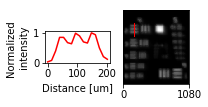

In [11]:
### focus in on group 4 element 2 which has a separation of 27.84 um. 
img = imgs[0]
img = np.fliplr(img)
img = scipy.misc.imrotate(img, 1.5)
cimg = img[260:350, 1200:1280]

dx = 13.5
xx = 13
y0 = 15
y1 = 31

fig = plt.figure(figsize=(15, 10))
gs = []
nr = 3
nc = 3
gs.append(plt.subplot2grid((nr, nc), (1, 0), colspan=1, rowspan=1))
gs.append(plt.subplot2grid((nr, nc), (0, 1), colspan=1, rowspan=3))

### Plot the line profile
plt.axes(gs[0])
line = cimg[np.arange(y0, y1), xx]
plt.plot(dx*np.arange(line.shape[0]), line/np.max(line), color='r')
plt.xticks([0, 100, 200])
plt.xlabel('Distance [um]')
plt.ylabel('Normalized \nintensity')

### Plot the resolution chart
plt.axes(gs[1])
plt.imshow(cimg, cmap='gray', extent=[0, cimg.shape[1], cimg.shape[0], 0], aspect='equal')
plt.xticks([0, cimg.shape[1]], (np.array([0, cimg.shape[1]])*dx).astype('int'))
plt.yticks([0, cimg.shape[0]], (np.array([0, cimg.shape[0]])*dx).astype('int'))
plt.yticks([])
# plt.axis('off')
plt.plot([xx, xx], [y0, y1], color='r', linestyle='-', linewidth=1)

plt.gcf().set_size_inches(w=4, h=2) # Control size of figure in inches

plt.savefig(fig_save_dir + 'res_chart.pdf',
            transparent=True, rasterized=True, dpi=600) 